In [127]:
import datetime
from datetime import date

import geopandas
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import os
import sys
import xarray as xr
import pandas as pd
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt

Data paths
1 Change the path accordingly

nino_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/nino/nino34.long.anom.data.csv'
nino_final_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/nino/nino34.long.anom.data.final.csv'

NA_stations_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/station_coordinates/noramsnow_1979_2021_stations.csv'

SWE_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/nc_file/'
SWE_file_name = 'SWE_gapfilled_for_basin_06746095.nc'

SWE_test_file = SWE_path + SWE_file_name
print(SWE_test_file)

In [ ]:
nino_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/nino/nino34.long.anom.data.csv'
nino_final_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/nino/nino34.long.anom.data.final.csv'

NA_stations_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/station_coordinates/noramsnow_1979_2021_stations.csv'

SWE_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/nc_file/'
SWE_file_name = 'SWE_gapfilled_for_basin_06746095.nc'

SWE_test_file = SWE_path + SWE_file_name
print(SWE_test_file)

In [143]:
nino_index = pd.read_csv(nino_path)
nino_index.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                      'Sep', 'Oct', 'Nov', 'Dec']

# Fill missing values with mean of the respective column 
nino_index_filled = nino_index.fillna(nino_index.mean())

# Verify missing values filled
print(nino_index_filled.head(10))

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1871 -0.25 -0.58 -0.43 -0.50 -0.70 -0.53 -0.60 -0.33 -0.24 -0.33 -0.31   
1  1872 -0.72 -0.62 -0.50 -0.77 -0.62 -0.52 -0.32 -0.85 -1.02 -0.94 -0.79   
2  1873 -0.78 -1.01 -1.31 -0.67 -0.53 -0.48 -0.58 -0.39 -0.34 -0.78 -0.77   
3  1874 -0.93 -1.06 -1.40 -0.94 -0.86 -0.72 -1.00 -1.05 -1.13 -1.25 -1.33   
4  1875 -0.71 -0.37 -0.59 -0.87 -1.09 -0.76 -0.85 -0.81 -0.91 -0.83 -0.64   
5  1876 -0.95 -1.20 -1.13 -1.18 -1.08 -0.43 -0.34 -0.16 -0.02  0.11  0.15   
6  1877  0.35  0.46  0.52  0.50  0.76  0.98  1.42  1.54  1.75  1.95  2.08   
7  1878  2.41  2.43  1.31  0.92  0.82  0.92  0.25 -0.11 -0.32 -0.53 -0.70   
8  1879 -0.55 -0.18 -0.24 -0.37 -0.83 -0.67 -0.77 -0.69 -0.83 -0.93 -1.14   
9  1880 -1.00 -0.73 -0.62 -0.57 -0.71 -0.61 -0.53 -0.24 -0.03  0.17  0.24   

    Dec  
0 -0.58  
1 -0.88  
2 -0.70  
3 -1.14  
4 -0.75  
5  0.23  
6  2.49  
7 -0.75  
8 -1.02  
9  0.18  



months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                      'Sep', 'Oct', 'Nov', 'Dec']
for month in months:
    plt.plot(nino_index_filled['year'], nino_index_filled[month])
    plt.title(f'Temperature in {month} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.show()

In [145]:
# Melt the DataFrame to long format
melted_df = nino_index.melt(id_vars='Year', var_name='Month', value_name='Value')
# Create a new column "Year and Month"
melted_df['YearMonth'] = melted_df['Year'].astype(str) + '-' + melted_df['Month']
# Convert 'YearMonth' to datetime format
melted_df['YearMonth'] = pd.to_datetime(melted_df['YearMonth'], format='%Y-%b')
# Drop the year and Month columns
melted_df.drop(['Year', 'Month'], axis=1, inplace=True)
# Rearrange the columns
melted_df = melted_df[['YearMonth', 'Value']]
# Write the DataFrame to a csv file
melted_df.to_csv(nino_final_path, index=False)

print(melted_df,10)


      YearMonth  Value
0    1871-01-01  -0.25
1    1872-01-01  -0.72
2    1873-01-01  -0.78
3    1874-01-01  -0.93
4    1875-01-01  -0.71
...         ...    ...
1831 2019-12-01   0.51
1832 2020-12-01  -0.98
1833 2021-12-01  -1.07
1834 2022-12-01  -0.86
1835 2023-12-01   1.81

[1836 rows x 2 columns] 10


In [131]:

NA_stations = pd.read_csv(NA_stations_path)

# Create a geometry column with Point objects directly in the DataFrame
NA_stations['geometry'] = NA_stations.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Create a GeoDataFrame from the DataFrame and specify the new geometry column as the geometry for the GeoDataFrame
gdf = gpd.GeoDataFrame(NA_stations, crs="EPSG:4326")
gdf.set_geometry('geometry', inplace=True)

# Print the GeoDataFrame to see the structure
display(gdf,10)

,station_id,lat,lon,geometry
0,ALE-05AA805,49.266666,-114.349998,POINT (-114.35000 49.26667)
1,ALE-05AA806,49.816666,-114.633331,POINT (-114.63333 49.81667)
2,ALE-05AD802,49.250000,-114.050003,POINT (-114.05000 49.25000)
3,ALE-05AE804,48.833332,-113.716667,POINT (-113.71667 48.83333)
4,ALE-05AE805,48.766666,-113.699997,POINT (-113.70000 48.76667)
...,...,...,...,...
6607,US_NE_1599,45.223415,-68.575625,POINT (-68.57563 45.22342)
6608,US_NE_1600,45.476738,-68.553666,POINT (-68.55367 45.47674)
6609,US_NE_1598,45.323000,-68.580930,POINT (-68.58093 45.32300)
6610,US_NE_1602,43.872777,-70.457029,POINT (-70.45703 43.87278)


10

Plot stations available

/var/folders/g6/d7zppkyj7g98fd6kn97dkcq40000gn/T/ipykernel_49216/2890749961.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


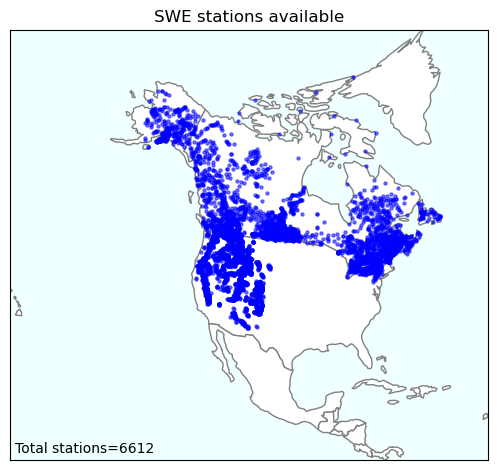

In [132]:
# Plot SWE stations available
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
NA_gdf = world_gdf[world_gdf['continent']=='North America'].to_crs("ESRI:102008")
ax = NA_gdf.plot(linewidth=1, edgecolor='grey', color='white')
SWE_stations_gdf = gdf.copy().to_crs("ESRI:102008")
SWE_stations_gdf.plot(ax=ax, color='b', alpha=.5, markersize=5)             
minx, miny, maxx, maxy = np.nanmin(NA_gdf.geometry.bounds.minx),np.nanmin(NA_gdf.geometry.bounds.miny),np.nanmax(NA_gdf.geometry.bounds.maxx),np.nanmax(NA_gdf.geometry.bounds.maxy)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.margins(0)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax.set_facecolor('azure')
plt.title('SWE stations available')
plt.text(.01, .01,'Total stations='+str(len(SWE_stations_gdf.index)), ha='left', va='bottom', transform=ax.transAxes)
plt.tight_layout();
plt.savefig('SWE_stations.png')
plt.show()
plt.close()

In [133]:
import xarray as xr

basin = xr.open_dataset(SWE_test_file)
SWE_testbasin_ds = basin.to_dataframe().drop(columns=['flag','donor_stations'])
# Flatten the DataFrame
SWE_testbasin_ds = SWE_testbasin_ds.reset_index()

# Drop rows with empty SWE
SWE_testbasin_ds = SWE_testbasin_ds.dropna(subset=['SWE'])

display(SWE_testbasin_ds, 10)

,time,station_id,SWE
2,1979-01-01,SNOTEL_551,128.190002
5,1979-01-02,SNOTEL_551,129.160004
8,1979-01-03,SNOTEL_551,130.119995
11,1979-01-04,SNOTEL_551,130.899994
14,1979-01-05,SNOTEL_551,131.720001
...,...,...,...
47480,2022-05-01,SNOTEL_551,596.900024
47483,2022-05-02,SNOTEL_551,593.090027
47486,2022-05-03,SNOTEL_551,577.820007
47489,2022-05-04,SNOTEL_551,577.679993


10

In [134]:
import xarray as xr
import pandas as pd

SWE_testbasin_ds = basin.to_dataframe().drop(columns=['flag','donor_stations'])
# Flatten the DataFrame
SWE_testbasin_ds = SWE_testbasin_ds.reset_index()
# Drop rows with empty SWE
SWE_testbasin_ds = SWE_testbasin_ds.dropna(subset=['SWE'])
# Convert time to datetime format
SWE_testbasin_ds['time'] = pd.to_datetime(SWE_testbasin_ds['time'], format="%Y-%m-%d")
# Create a new column that contains the year and month
SWE_testbasin_ds['month'] = SWE_testbasin_ds['time'].dt.to_period('M').dt.to_timestamp()
# Calculate average SWE for each time and station_id
SWE_avg = SWE_testbasin_ds.groupby(['month', 'station_id'])['SWE'].mean().reset_index()

display(SWE_avg, 10)


,month,station_id,SWE
0,1979-01-01,NRCS_CO_05J01,127.758179
1,1979-01-01,NRCS_CO_05J37,119.161430
2,1979-01-01,SNOTEL_551,143.807739
3,1979-02-01,NRCS_CO_05J01,149.736877
4,1979-02-01,NRCS_CO_05J37,145.951111
...,...,...,...
1045,2022-04-01,NRCS_CO_05J01,660.400024
1046,2022-04-01,NRCS_CO_05J37,726.298889
1047,2022-04-01,SNOTEL_551,540.946472
1048,2022-05-01,NRCS_CO_05J37,746.760010


10

In [140]:
SWE_avg_month = SWE_testbasin_ds.groupby(['month'])['SWE'].mean().reset_index()

display(SWE_avg_month, 10)

,month,SWE
0,1979-01-01,136.683868
1,1979-02-01,170.262634
2,1979-03-01,282.080688
3,1979-04-01,233.904648
4,1979-05-01,173.124893
...,...,...
510,2022-01-01,398.008728
511,2022-02-01,422.475922
512,2022-03-01,487.316376
513,2022-04-01,607.154785


10

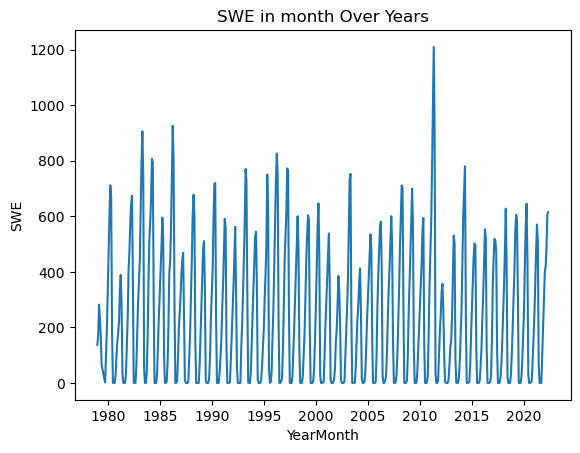

In [142]:
plt.plot(SWE_avg_month['month'], SWE_avg_month['SWE'])
plt.title(f'SWE in month Over Years')
plt.xlabel('YearMonth')
plt.ylabel('SWE')
plt.show()

In [136]:
import pandas as pd

# Firstly, we need to make sure that both 'YearMonth' and 'time' are in datetime format
melted_df['YearMonth'] = pd.to_datetime(melted_df['YearMonth'])
SWE_avg['month'] = pd.to_datetime(SWE_avg['month'])

# Merge the dataframes
df_merged = pd.merge(left=SWE_avg, right=melted_df, right_on='YearMonth', left_on='month')

df_merged = df_merged.drop(['YearMonth'], axis=1).rename(columns={'Value':'Nino'})

display(df_merged, 10)

,month,station_id,SWE,Nino
0,1979-01-01,NRCS_CO_05J01,127.758179,0.05
1,1979-01-01,NRCS_CO_05J37,119.161430,0.05
2,1979-01-01,SNOTEL_551,143.807739,0.05
3,1979-02-01,NRCS_CO_05J01,149.736877,0.09
4,1979-02-01,NRCS_CO_05J37,145.951111,0.09
...,...,...,...,...
1045,2022-04-01,NRCS_CO_05J01,660.400024,-0.90
1046,2022-04-01,NRCS_CO_05J37,726.298889,-0.90
1047,2022-04-01,SNOTEL_551,540.946472,-0.90
1048,2022-05-01,NRCS_CO_05J37,746.760010,-1.02


10

pip install pandasql

1. Uaing this dataframe can be queried more effectively

In [137]:
from pandasql import sqldf

output = sqldf("select * from df_merged where NINO IS not NULL")

display(output)

,month,station_id,SWE,Nino
0,1979-01-01 00:00:00.000000,NRCS_CO_05J01,127.758179,0.05
1,1979-01-01 00:00:00.000000,NRCS_CO_05J37,119.161430,0.05
2,1979-01-01 00:00:00.000000,SNOTEL_551,143.807739,0.05
3,1979-02-01 00:00:00.000000,NRCS_CO_05J01,149.736877,0.09
4,1979-02-01 00:00:00.000000,NRCS_CO_05J37,145.951111,0.09
...,...,...,...,...
1045,2022-04-01 00:00:00.000000,NRCS_CO_05J01,660.400024,-0.90
1046,2022-04-01 00:00:00.000000,NRCS_CO_05J37,726.298889,-0.90
1047,2022-04-01 00:00:00.000000,SNOTEL_551,540.946472,-0.90
1048,2022-05-01 00:00:00.000000,NRCS_CO_05J37,746.760010,-1.02


In [138]:
# Merge the dataframes
df_merged_with_coord = pd.merge(left=df_merged, right=gdf, right_on='station_id', left_on='station_id')

df_merged_with_coord = df_merged_with_coord.drop(['lat','lon'], axis=1)

display(df_merged_with_coord, 10)

,month,station_id,SWE,Nino,geometry
0,1979-01-01,NRCS_CO_05J01,127.758179,0.05,POINT (-105.89000 40.52000)
1,1979-02-01,NRCS_CO_05J01,149.736877,0.09,POINT (-105.89000 40.52000)
2,1979-03-01,NRCS_CO_05J01,305.888885,0.13,POINT (-105.89000 40.52000)
3,1979-04-01,NRCS_CO_05J01,222.835876,0.17,POINT (-105.89000 40.52000)
4,1979-05-01,NRCS_CO_05J01,195.891434,-0.09,POINT (-105.89000 40.52000)
...,...,...,...,...,...
1045,2022-01-01,SNOTEL_551,366.165009,-0.77,POINT (-105.89000 40.53000)
1046,2022-02-01,SNOTEL_551,378.701782,-0.68,POINT (-105.89000 40.53000)
1047,2022-03-01,SNOTEL_551,438.663330,-0.84,POINT (-105.89000 40.53000)
1048,2022-04-01,SNOTEL_551,540.946472,-0.90,POINT (-105.89000 40.53000)


10